In [ ]:
! pip install transformers

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

# Load dataset

In [ ]:
fake_data=pd.read_csv("FakeNews/Fake.csv")
real_data=pd.read_csv("FakeNews/True.csv")

# Data Analysis

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


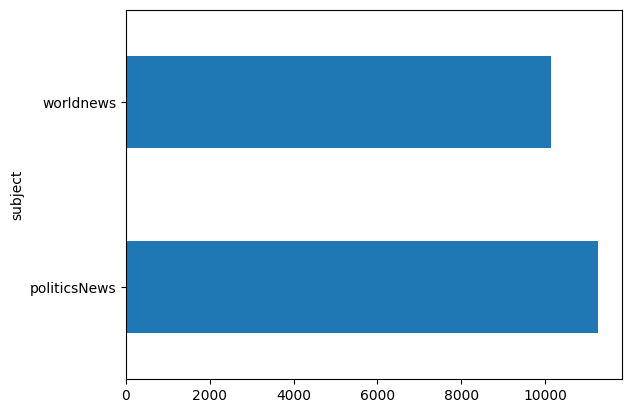

In [ ]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5


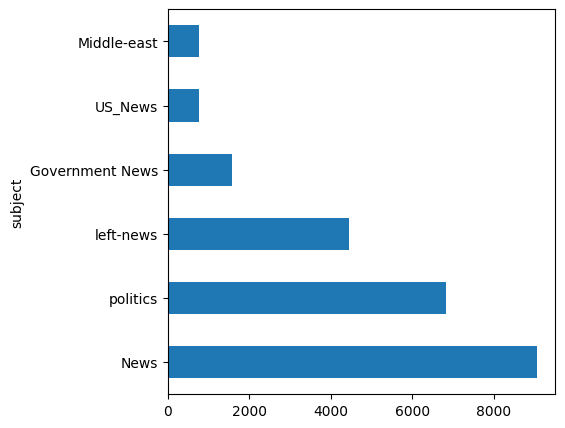

In [ ]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

# wordcloud real text data

In [ ]:
wordcld_mask=np.array(Image.open("FakeNews/twitter.png"))

In [ ]:
wordcld_text=" ".join(real_data["text"].tolist())

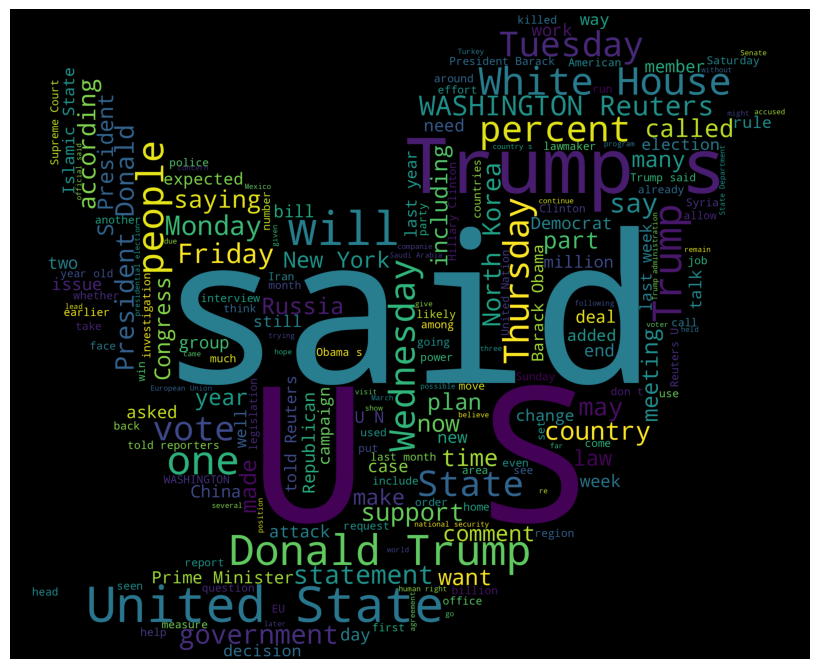

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# wordcloud fake text data

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

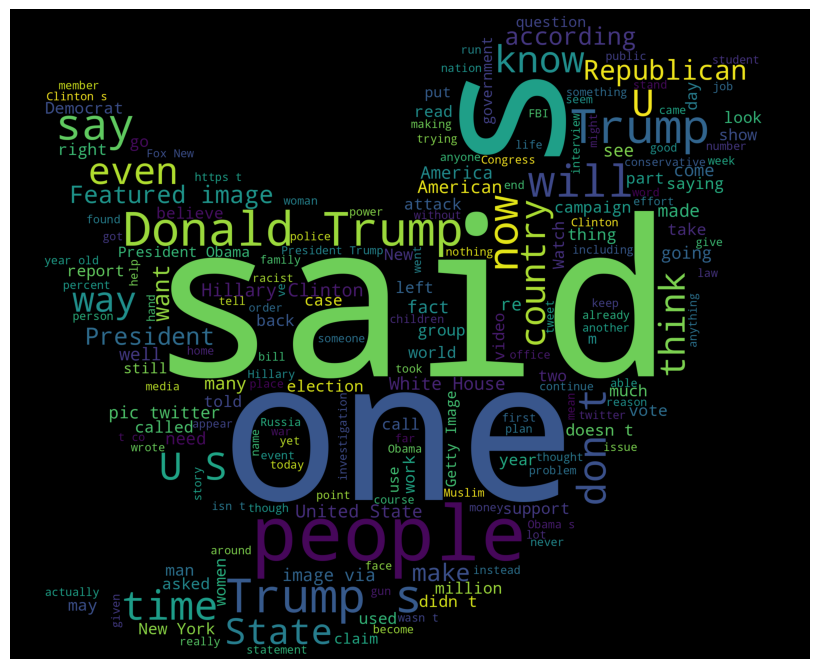

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fake_data["label"]="fake"
real_data["label"]="real"

In [ ]:
final_data= pd.concat([fake_data,real_data])

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
final_data.head(10)

,title,text,subject,date,label
0,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",real
1,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,politics,"Mar 12, 2017",fake
2,Venezuela's Maduro says 'terrorists' stole wea...,CARACAS (Reuters) - Venezuelan leftist Preside...,worldnews,"December 20, 2017",real
3,Guess What UK Political Leaders Really Think ...,The British Parliament conducted what can only...,News,"January 18, 2016",fake
4,WOW! Governor Kasich Just Revealed How He Did ...,"Ohio Governor John Kasich, who signed a pledge...",left-news,"Nov 1, 2016",fake
5,First Supreme Court 4-4 Tie Screws Republican...,Republicans were handed a harsh reminder of ho...,News,"March 30, 2016",fake
6,Abbas: U.N. must try to end Israeli occupation...,UNITED NATIONS (Reuters) - Palestinian preside...,worldnews,"September 20, 2017",real
7,Russia's Putin calls for gradual reform of U.N.,"SOCHI, Russia (Reuters) - Russian President Vl...",worldnews,"October 19, 2017",real
8,Trump Gives Insane Warning On Religious Right...,Donald Trump is continuing his campaign of fea...,News,"September 9, 2016",fake
9,YALE DISFIGURES STONE CARVING to Disarm Purita...,Idiots! That s the first comment at Yale Alum...,left-news,"Aug 13, 2017",fake


In [ ]:
final_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,real
1,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,fake
2,Venezuela's Maduro says 'terrorists' stole wea...,CARACAS (Reuters) - Venezuelan leftist Preside...,real
3,Guess What UK Political Leaders Really Think ...,The British Parliament conducted what can only...,fake
4,WOW! Governor Kasich Just Revealed How He Did ...,"Ohio Governor John Kasich, who signed a pledge...",fake
...,...,...,...
44893,Hard-right German party tells Trump to tweet less,BERLIN (Reuters) - The hard-right Alternative ...,real
44894,Trump nominates Callista Gingrich as ambassado...,WASHINGTON (Reuters) - President Donald Trump ...,real
44895,White House seeking sharp budget cut to climat...,WASHINGTON (Reuters) - The Trump administratio...,real
44896,SENATOR GILLIBRAND Pulled Strings So Muslim At...,Democrat Senator Kristen Gillibrand (NY) likes...,fake


In [ ]:
final_data.head()

,title,text,subject,date,label
0,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",real
1,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,politics,"Mar 12, 2017",fake
2,Venezuela's Maduro says 'terrorists' stole wea...,CARACAS (Reuters) - Venezuelan leftist Preside...,worldnews,"December 20, 2017",real
3,Guess What UK Political Leaders Really Think ...,The British Parliament conducted what can only...,News,"January 18, 2016",fake
4,WOW! Governor Kasich Just Revealed How He Did ...,"Ohio Governor John Kasich, who signed a pledge...",left-news,"Nov 1, 2016",fake


In [ ]:
final_data.label.value_counts()

,count
label,
fake,23481
real,21417


<Axes: xlabel='label', ylabel='count'>

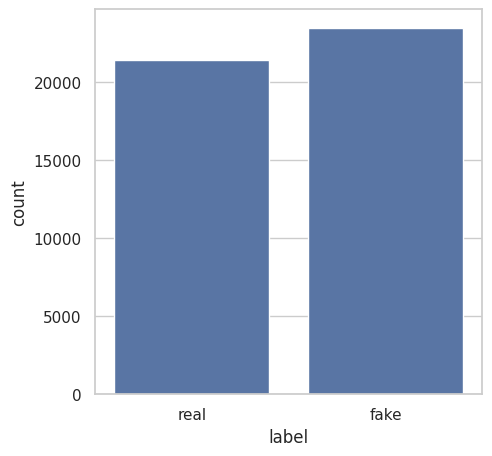

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [ ]:
final_data.head(5)

,title,text,subject,date,label
0,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",real
1,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,politics,"Mar 12, 2017",fake
2,Venezuela's Maduro says 'terrorists' stole wea...,CARACAS (Reuters) - Venezuelan leftist Preside...,worldnews,"December 20, 2017",real
3,Guess What UK Political Leaders Really Think ...,The British Parliament conducted what can only...,News,"January 18, 2016",fake
4,WOW! Governor Kasich Just Revealed How He Did ...,"Ohio Governor John Kasich, who signed a pledge...",left-news,"Nov 1, 2016",fake


In [ ]:
final_data["text"]=final_data["title"]+final_data["text"]

In [ ]:
final_data=final_data[["text","label"]]

In [ ]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [ ]:
final_data.sample(5)

,text,label
3126,Merkel says meeting with Erdogan underscored d...,1
1831,MUSLIMS OUTRAGED: MUNICH ARTIST DISPLAYS “Funn...,0
7014,Trump picks Rep. Mulvaney to head White House ...,1
35577,Kuwait denies it imposed travel ban praised by...,1
22917,"Trump Caught Illegally Buying $55,000 Worth O...",0


In [ ]:
final_data.label[9943]

0

In [ ]:
final_data.text[36709]

"Trump to speak with Germany's Merkel, Japan's Abe: White HouseWASHINGTON (Reuters) - U.S. President Donald Trump is scheduled to speak with German Chancellor Angela Merkel and Japanese Prime Minister Shinzo Abe later on Wednesday, the White House said in a statement that gave no other details.  The scheduled telephone calls come as a senior ally of Merkel earlier on Wednesday pressed Japan to quickly seal a trade deal with the European Union. "

In [ ]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
maxlen=100

# create bert model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model

class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        return self.bert(inputs)[1]

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertLayer(bert_model)
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})

    x = Dropout(0.5)(pooled_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# Create the model
model = create_model(bert_model)

# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ attention_mask[0][0],  │
│                           │                        │                │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         49,216 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # or another metric you want to monitor
    patience=3,  # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=3,  # Number of epochs with no improvement to wait before reducing the learning rate
    verbose=1,
    min_lr=1e-6  # Minimum learning rate
)

In [ ]:
history = model.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask']
    },
    y=Y_train,
    epochs=20,
    batch_size=30,
    validation_data=(
        {
            'input_ids': X_test_token['input_ids'],
            'attention_mask': X_test_token['attention_mask']
        },
        Y_test
    ),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.4991 - loss: 0.8232

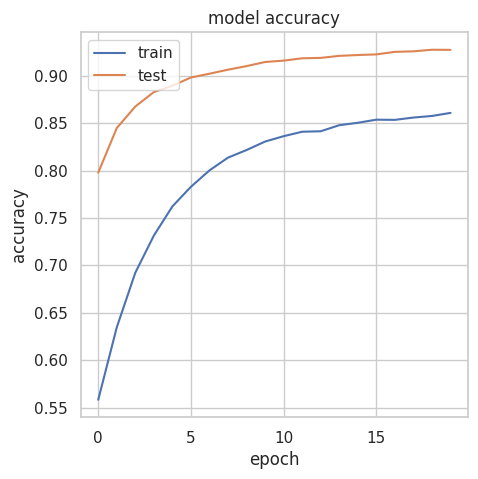

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

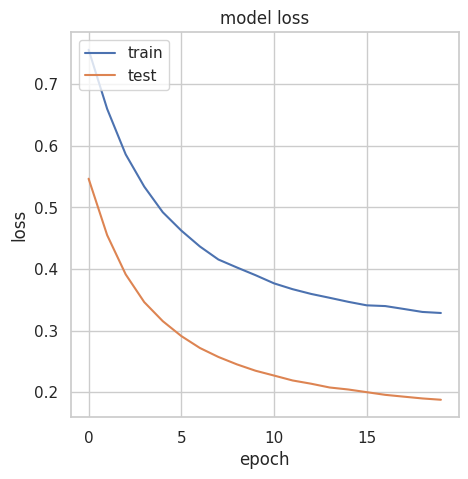

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Make predictions
y_pred_proba = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Convert probabilities to binary predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)


W0000 00:00:1725209619.171169    1327 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


280/281 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

W0000 00:00:1725209646.696086    1324 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


281/281 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step


# Confusion matrix

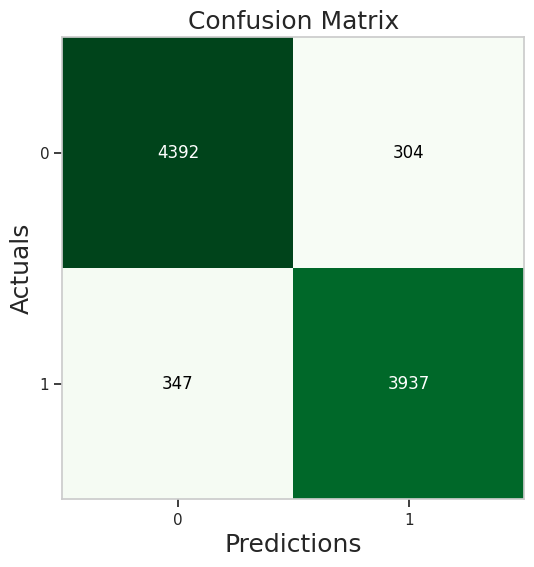

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4696
           1       0.93      0.92      0.92      4284

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


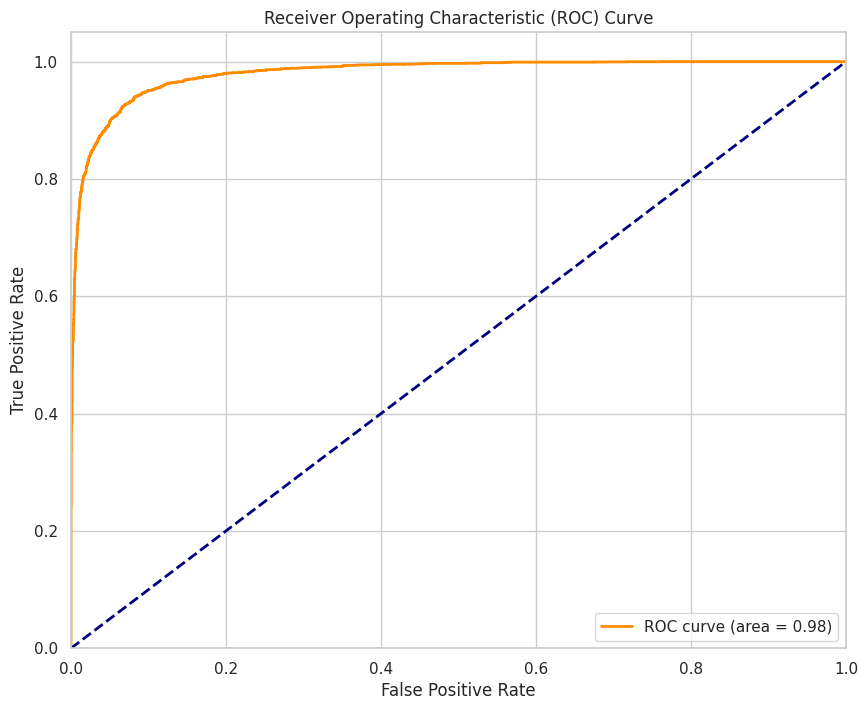

In [ ]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }-
)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)  # Removed indexing on y_pred_prob
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step


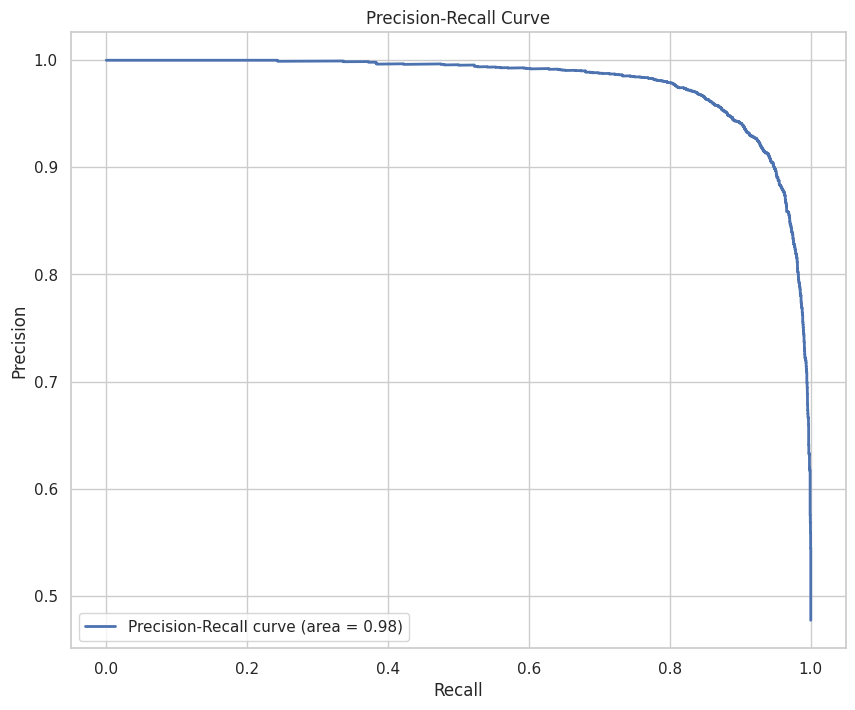

In [ ]:
from sklearn.metrics import precision_recall_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10,8))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step


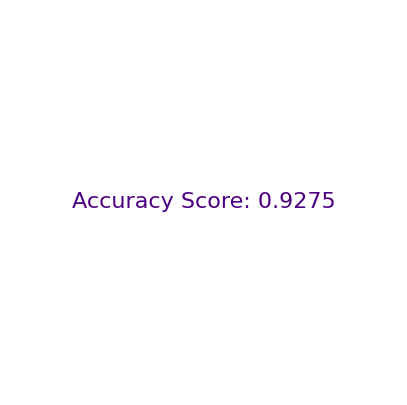

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(Y_test, pred)

plt.plot([])
plt.text(0, 0, f'Accuracy Score: {accuracy:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step


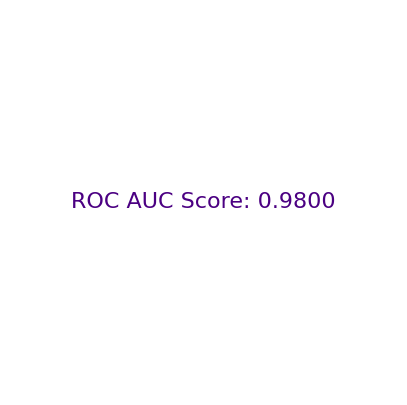

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'ROC AUC Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


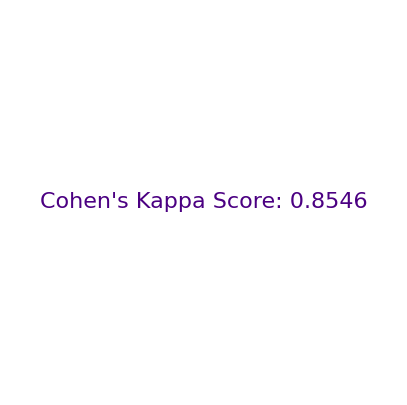

In [ ]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, brier_score_loss
import matplotlib.pyplot as plt

# Assuming you have `y_pred_prob` for predicted probabilities and `Y_test` for true labels
pred = (y_pred_prob > 0.5).astype(int)

cohen_kappa = cohen_kappa_score(Y_test, pred)
matthews_corr = matthews_corrcoef(Y_test, pred)
brier_score = brier_score_loss(Y_test, y_pred_prob)

# Plot Cohen's Kappa Score
plt.plot([])
plt.text(0, 0, f'Cohen\'s Kappa Score: {cohen_kappa:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()






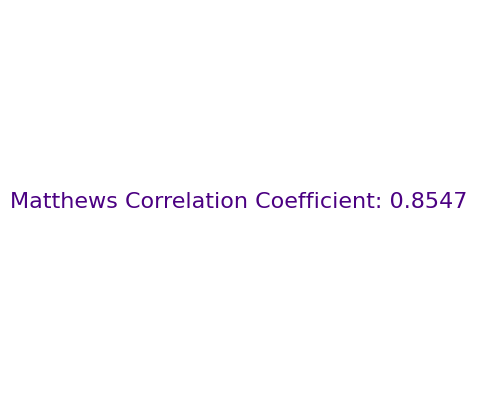

In [ ]:
# Plot Matthews Correlation Coefficient
plt.plot([])
plt.text(0, 0, f'Matthews Correlation Coefficient: {matthews_corr:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

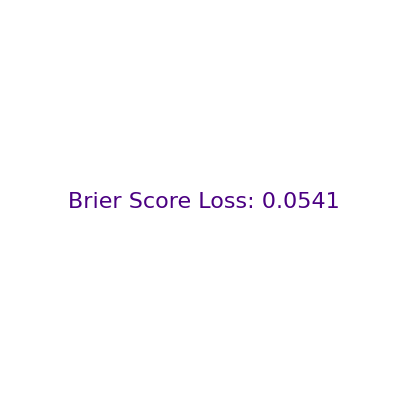

In [ ]:
# Plot Brier Score Loss
plt.plot([])
plt.text(0, 0, f'Brier Score Loss: {brier_score:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

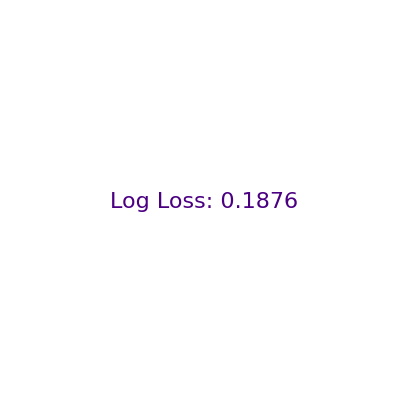

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

log_loss_value = log_loss(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'Log Loss: {log_loss_value:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


# Custom data prediction

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({
    'input_ids' : test_token['input_ids'],
    'attention_mask' : test_token['attention_mask']
}) >= 0.5, 1, 0)


68/69 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

W0000 00:00:1725209751.442950    1326 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step


In [ ]:
test_text_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
